In [125]:
import seaborn as sns

df = sns.load_dataset('penguins')
df.head()

#Adelie와 Gentoo 구분하기

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [126]:
import matplotlib.pyplot as plt

In [127]:
cond = df['species'].isin(['Adelie', 'Gentoo'])

In [128]:
feature_select1 = df.loc[cond, ['bill_length_mm', 'bill_depth_mm']]
feature_select2 = df.loc[cond, ['bill_length_mm', 'flipper_length_mm']]
feature_select3 = df.loc[cond, ['bill_length_mm', 'body_mass_g']]
feature_select4 = df.loc[cond, ['bill_depth_mm', 'flipper_length_mm']]
feature_select5 = df.loc[cond, ['bill_depth_mm', 'body_mass_g']]
feature_select6 = df.loc[cond, ['flipper_length_mm', 'body_mass_g']]


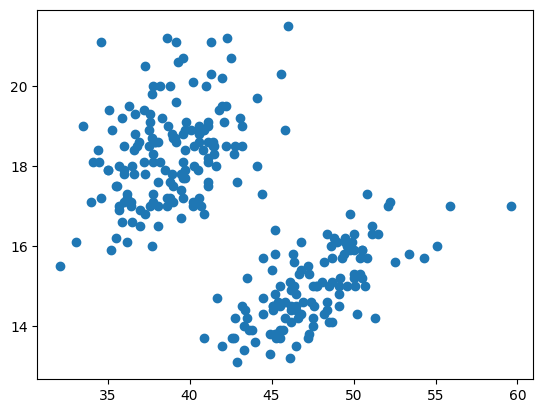

In [129]:
plt.scatter(feature_select1['bill_length_mm'].tolist(), feature_select1['bill_depth_mm'] )

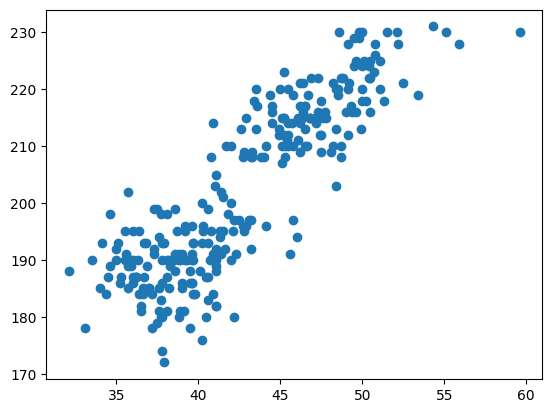

In [130]:
plt.scatter(feature_select2['bill_length_mm'].tolist(), feature_select2['flipper_length_mm'] )

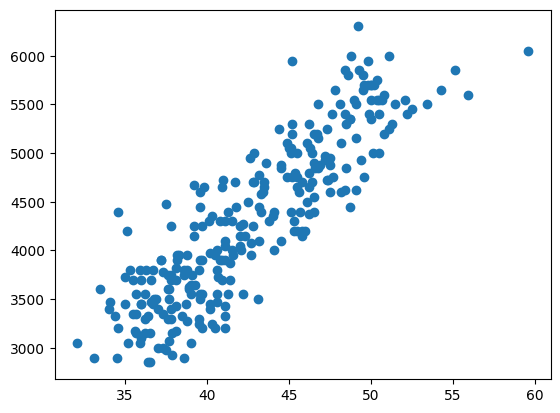

In [131]:
plt.scatter(feature_select3['bill_length_mm'].tolist(), feature_select3['body_mass_g'] )

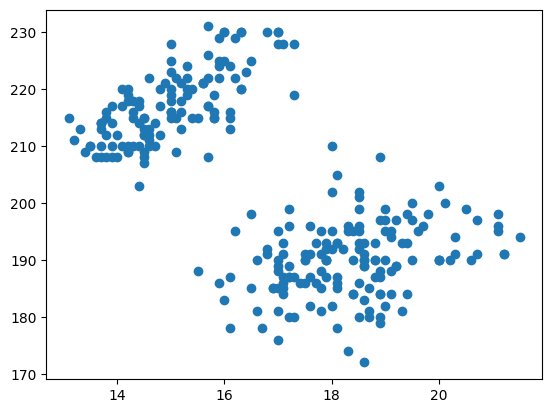

In [132]:
plt.scatter(feature_select4['bill_depth_mm'].tolist(), feature_select4['flipper_length_mm'] )

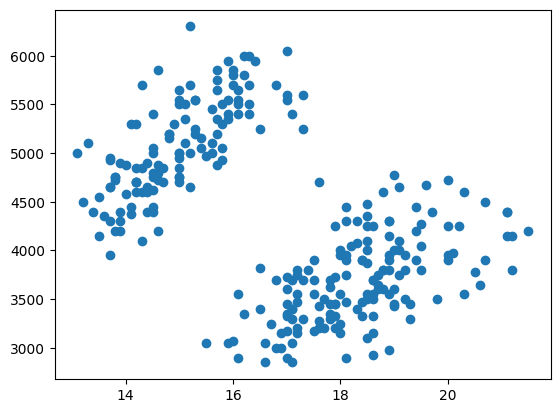

In [133]:
plt.scatter(feature_select5['bill_depth_mm'].tolist(), feature_select5['body_mass_g'] )

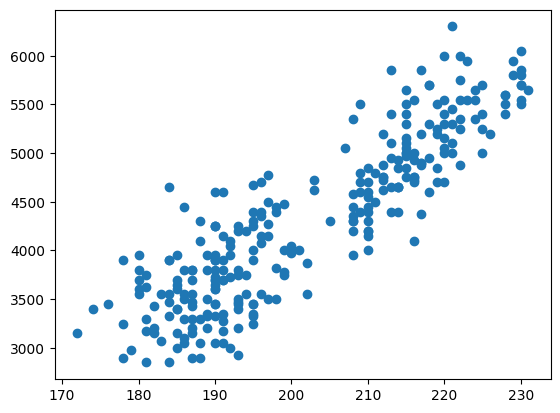

In [265]:
plt.scatter(feature_select6['flipper_length_mm'].tolist(), feature_select6['body_mass_g'] )

In [272]:
penguin_data = feature_select4

In [273]:
penguin_target = df.loc[cond,['species']]
penguin_target

,species
0,Adelie
1,Adelie
2,Adelie
3,Adelie
4,Adelie
...,...
339,Gentoo
340,Gentoo
341,Gentoo
342,Gentoo


In [274]:
from sklearn.model_selection import train_test_split
penguin_train_input, penguin_test_input, penguin_train_target, penguin_test_target =\
train_test_split(penguin_data, penguin_target)

In [275]:
penguin_train_input_mean = penguin_train_input.mean()
penguin_test_input_mean = penguin_test_input.mean()
penguin_train_input_nonull = penguin_train_input.fillna(penguin_train_input_mean)
penguin_test_input_nonull = penguin_test_input.fillna(penguin_test_input_mean)


In [276]:
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()

kn.fit(penguin_train_input_nonull, penguin_train_target['species'])

KNeighborsClassifier()

In [271]:
kn.score(penguin_test_input_nonull, penguin_test_target['species'] )

0.9130434782608695

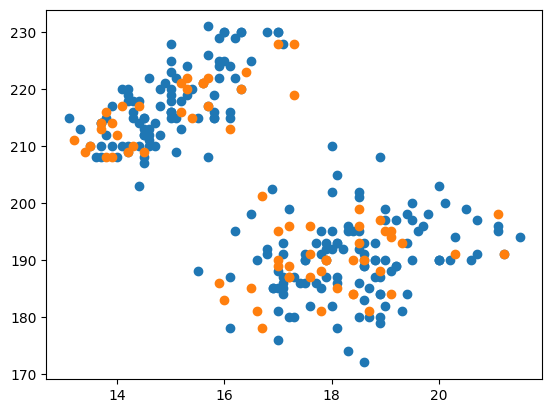

In [166]:
plt.scatter(penguin_train_input_nonull['bill_depth_mm'], penguin_train_input_nonull['flipper_length_mm'])
plt.scatter(penguin_test_input_nonull['bill_depth_mm'], penguin_test_input_nonull['flipper_length_mm'])

In [167]:
train_mean = penguin_train_input_nonull.mean()
train_std = penguin_train_input_nonull.std()
train_scaled = (penguin_train_input_nonull - train_mean) / train_std

In [168]:
test_mean = penguin_test_input_nonull.mean()
test_std = penguin_test_input_nonull.std()
test_scaled = (penguin_test_input_nonull - test_mean) / test_std

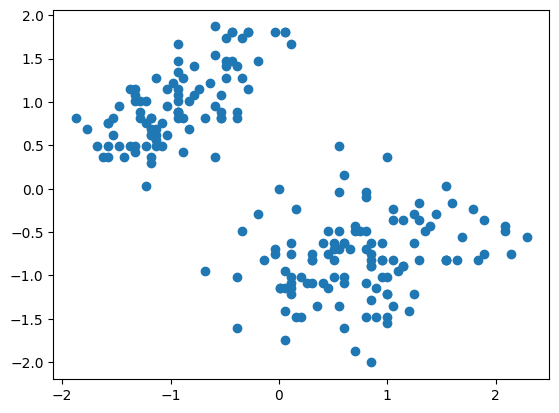

In [169]:
plt.scatter(train_scaled['bill_depth_mm'], train_scaled['flipper_length_mm'])

In [170]:
kn.fit(train_scaled, penguin_train_target['species'])

KNeighborsClassifier()

In [171]:
kn.score(test_scaled, penguin_test_target['species'])

1.0